In [4]:


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
data = pd.read_csv('used_device_data.csv')

Data Overview

# Shape of Data

In [234]:
data.shape


(3454, 15)

In [7]:
data.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


In [8]:
df = data.copy()

In [9]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3449    False
3450    False
3451    False
3452    False
3453    False
Length: 3454, dtype: bool

In [11]:
df.isnull().sum().sort_values()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
main_camera_mp           179
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


#Exploratory Data Analysis
Univariate Analysis



In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

normalized_used_price

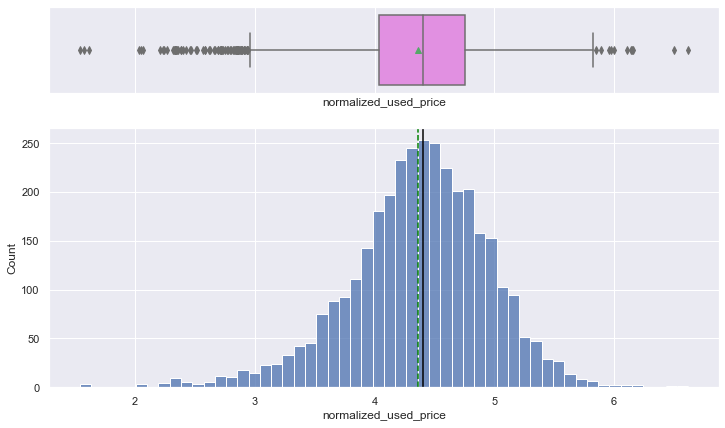

In [15]:
histogram_boxplot(df, "normalized_used_price")

normalized_new_price

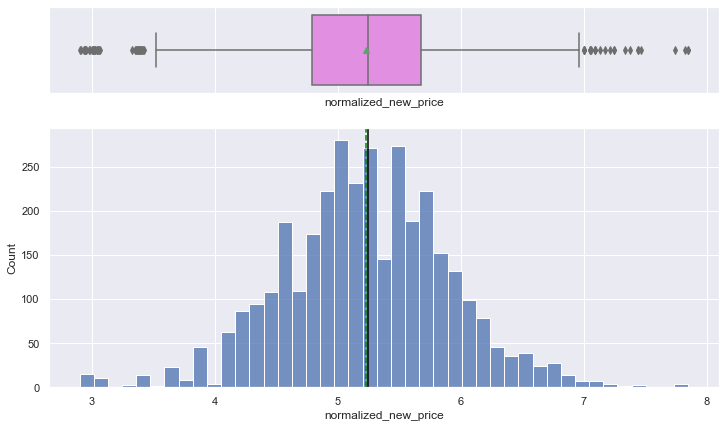

In [16]:
histogram_boxplot(df, "normalized_new_price")

screen_size

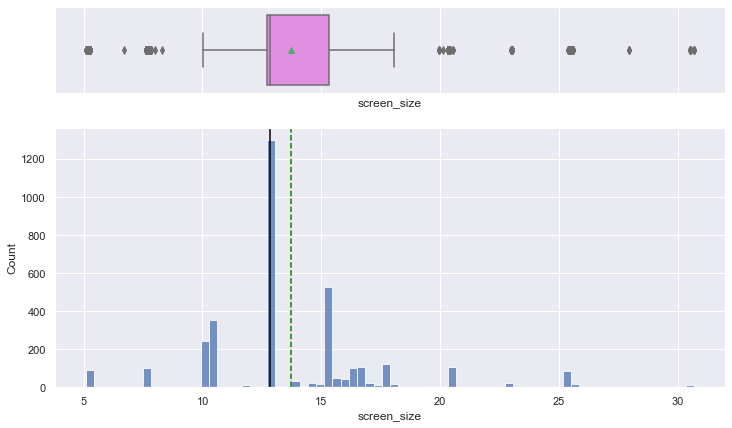

In [17]:
histogram_boxplot(df,"screen_size")

main_camera_mp

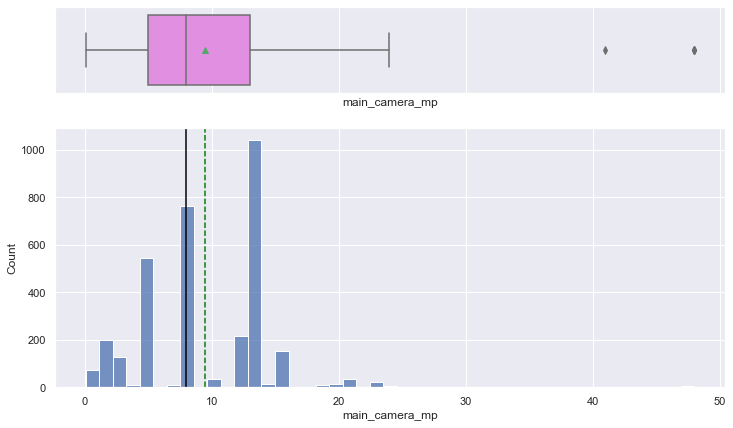

In [18]:
histogram_boxplot(df, "main_camera_mp")

selfie_camera_mp

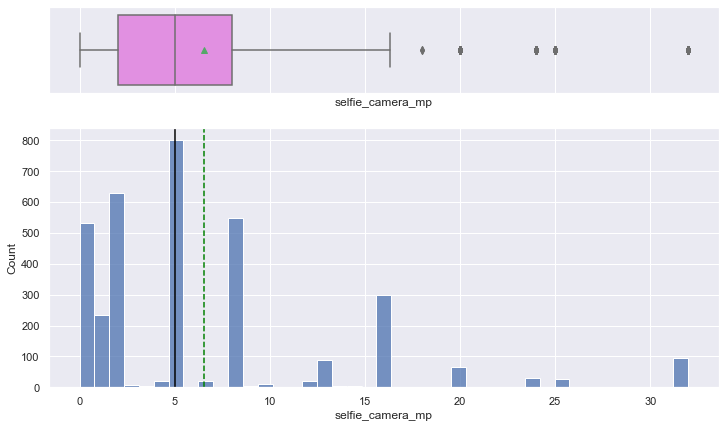

In [19]:
histogram_boxplot(df, "selfie_camera_mp")

int_memory

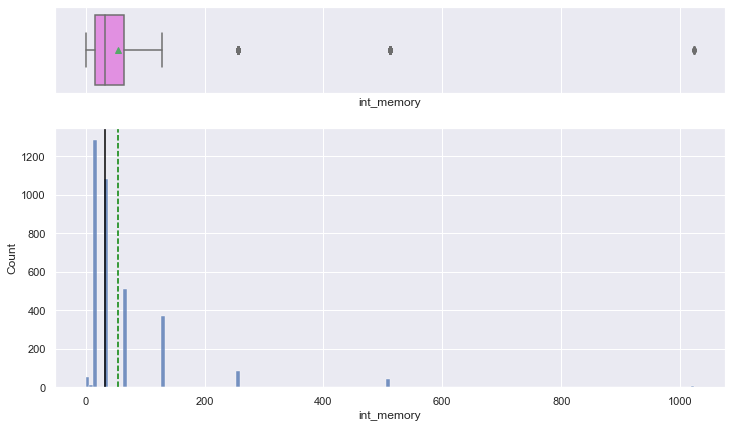

In [20]:
histogram_boxplot(df, "int_memory")

ram

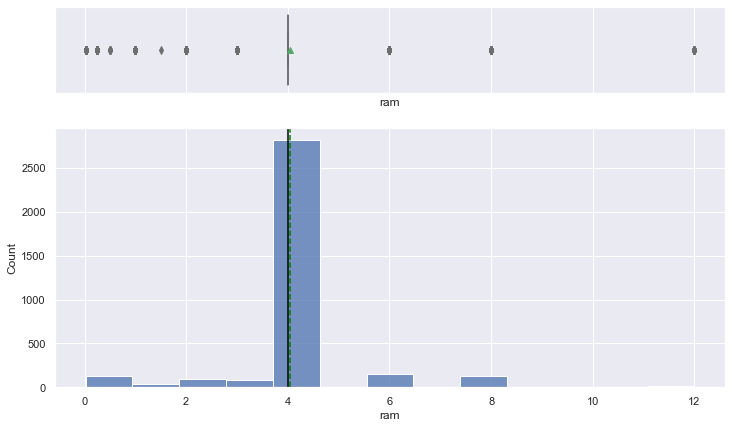

In [21]:
histogram_boxplot(df, "ram")

weight

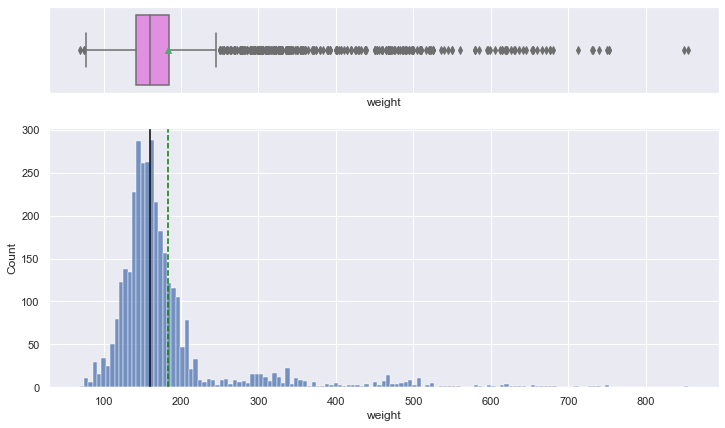

In [22]:
histogram_boxplot(df, "weight")

In [23]:
# let's apply the log transform to see if we can make the distribution of weight closer to normal
df["weight_log"] = np.log(df["weight"])

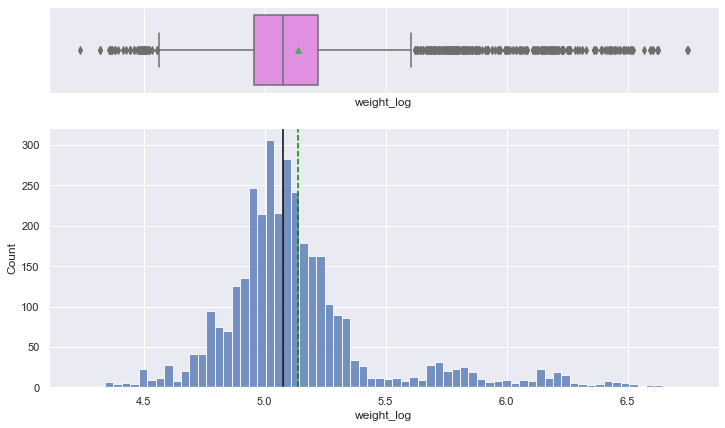

In [24]:
histogram_boxplot(df, "weight_log")

battery

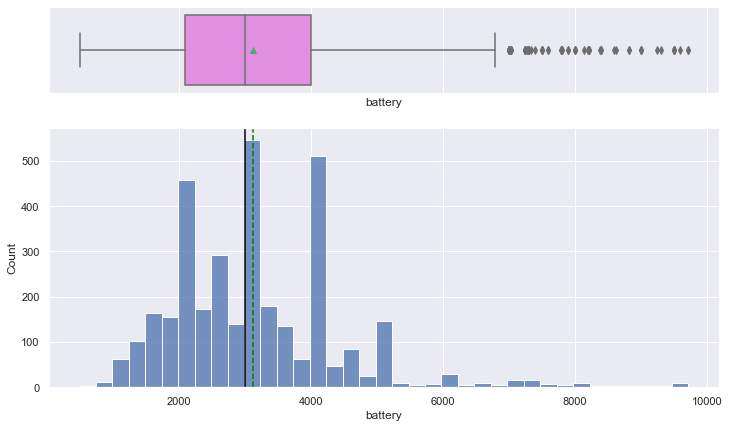

In [25]:
histogram_boxplot(df, "battery")

days_used

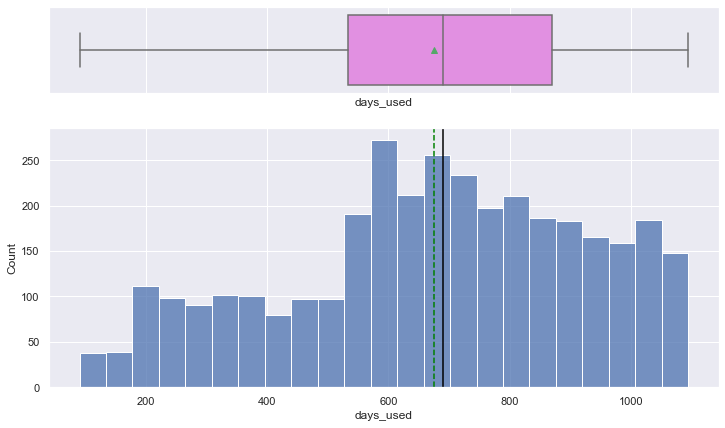

In [26]:
histogram_boxplot(df, "days_used")

brand_name

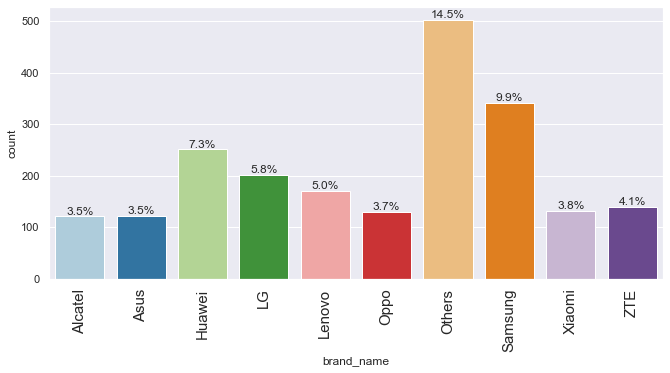

In [27]:
labeled_barplot(df, "brand_name", perc=True, n=10)

os

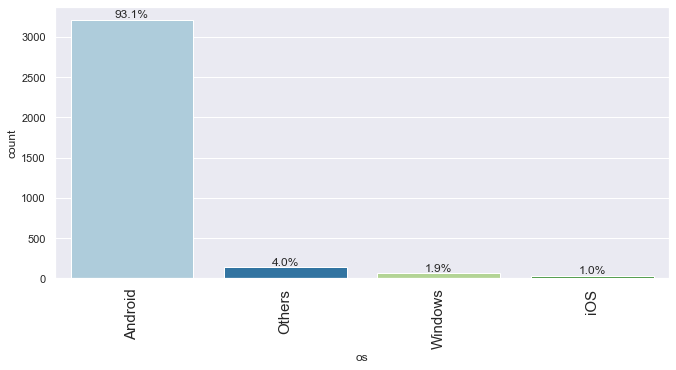

In [28]:
labeled_barplot(df, "os", perc=True, n=10)

4g

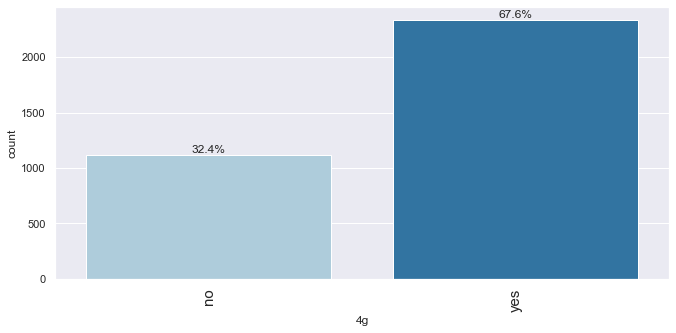

In [29]:
labeled_barplot(df, "4g", perc=True, n=10)

5g

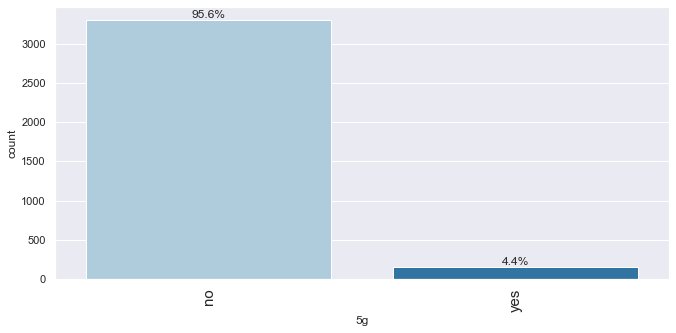

In [30]:
labeled_barplot(df, "5g", perc=True, n=10)

release_year

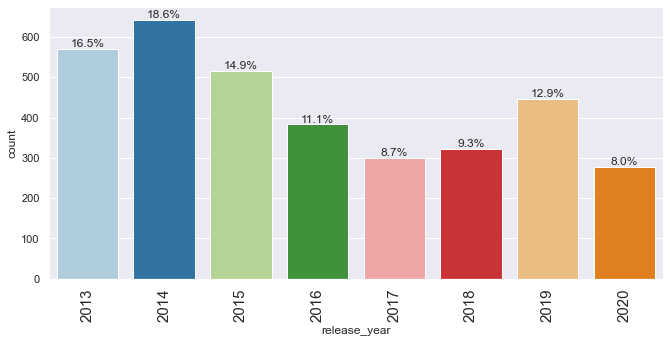

In [31]:
labeled_barplot(df, "release_year", perc=True, n=10)

Bivariate Analysis

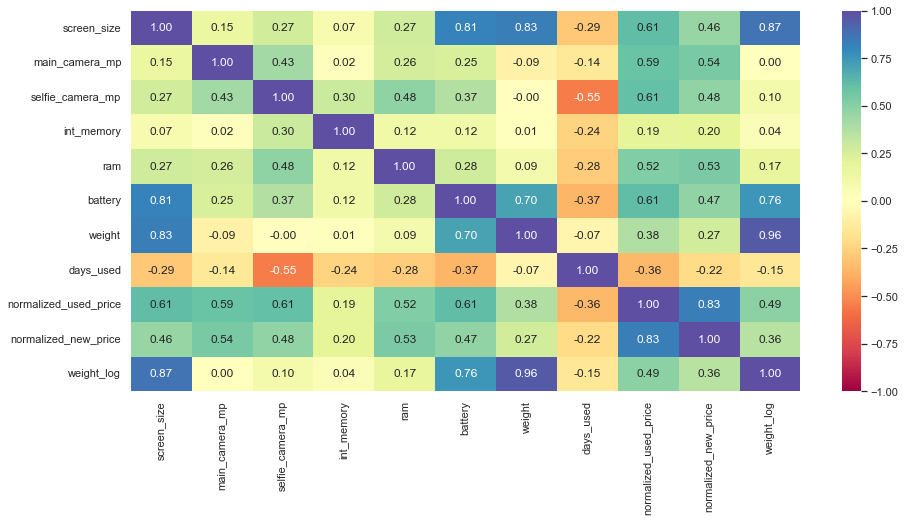

In [32]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.

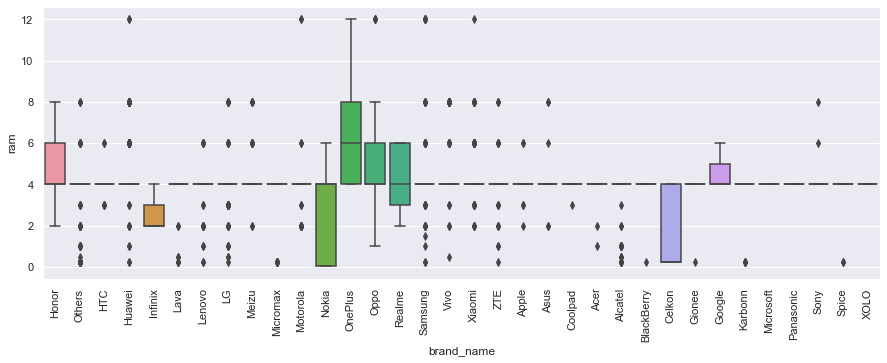

In [33]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.

In [34]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 16)

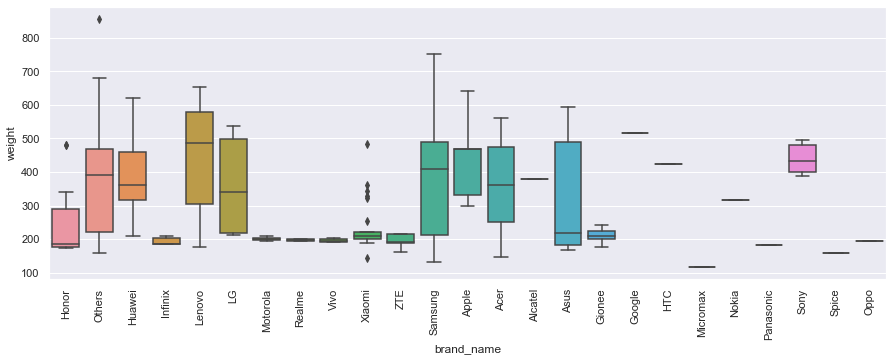

In [35]:
plt.figure(figsize=(15, 5))
sns.boxplot(y=(df_large_battery["weight"]), x=(df_large_battery["brand_name"]));
plt.xticks(rotation=90)
plt.show()

People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.

In [36]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 16)

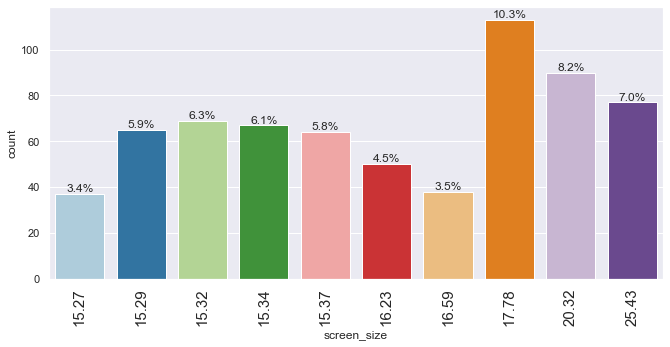

In [37]:
labeled_barplot(df_large_screen, "screen_size", perc=True, n=10) 

Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.

In [38]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 16)

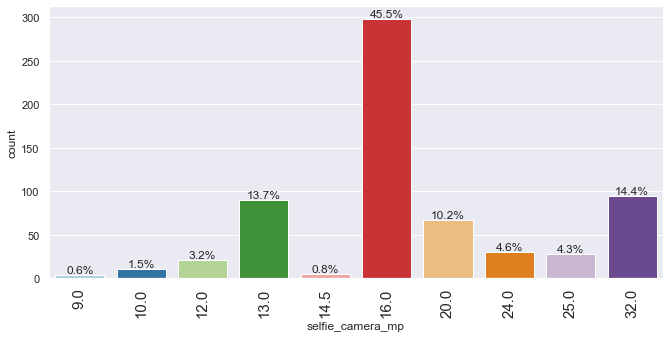

In [39]:
labeled_barplot(df_selfie_camera, "selfie_camera_mp", perc=True,n=10)

Let's do a similar analysis for rear cameras.

Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [40]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 16)

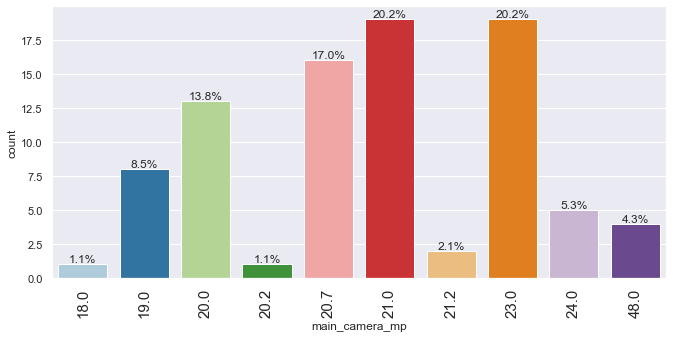

In [41]:
labeled_barplot(df_main_camera, "main_camera_mp", perc=True,n=10)

Let's see how the price of used devices varies across the years.

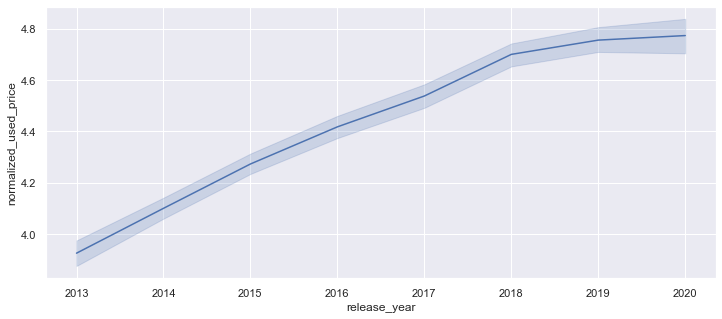

In [42]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='release_year', y='normalized_used_price', data=df) ## Complete the code to create a lineplot for release year and used price
plt.show()

In [43]:
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.

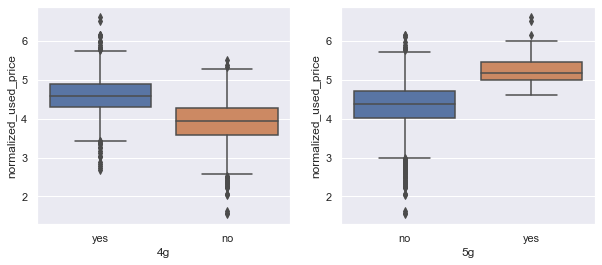

In [44]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

# Data Preprocessing:
Missing Value Imputation
We will impute the missing values in the data by the column medians grouped by release_year and brand_name.

In [45]:
# let's create a copy of the data
df1 = df.copy()

In [46]:
# checking for missing values
df1.isnull().sum().sort_values()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
weight_log                 7
main_camera_mp           179
dtype: int64

In [47]:
cols_impute = ["main_camera_mp","selfie_camera_mp", "int_memory", "ram", "battery", "weight",]


for col in cols_impute:
    df1[col] = df1.groupby(["release_year","brand_name"])[col].transform(lambda x: x.fillna(x.median()))
      

In [48]:
## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name


cols_impute = [ "main_camera_mp", "selfie_camera_mp", "battery", "weight",]

for col in cols_impute:
       df1[col] = df1.groupby(["brand_name"])[col].transform(lambda x: x.fillna(x.median()))

# We will fill the remaining missing values in the main_camera_mp column by the column median.
# We will re-apply the log-transform to the weight column.

In [49]:
## Complete the code to check missing values after imputing the above columns


df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) ## Complete the code to impute the data with median

# re-applying the log-transform to the weight column
df1["weight_log"] = np.log(df1["weight"])

# checking for missing values
df1.isnull().sum() 

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
dtype: int64

# Feature Engineering
Let's create a new column years_since_release from the release_year column.
We will consider the year of data collection, 2021, as the baseline.
We will drop the release_year column.

In [50]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

# Outlier Check
Let's check for outliers in the data.

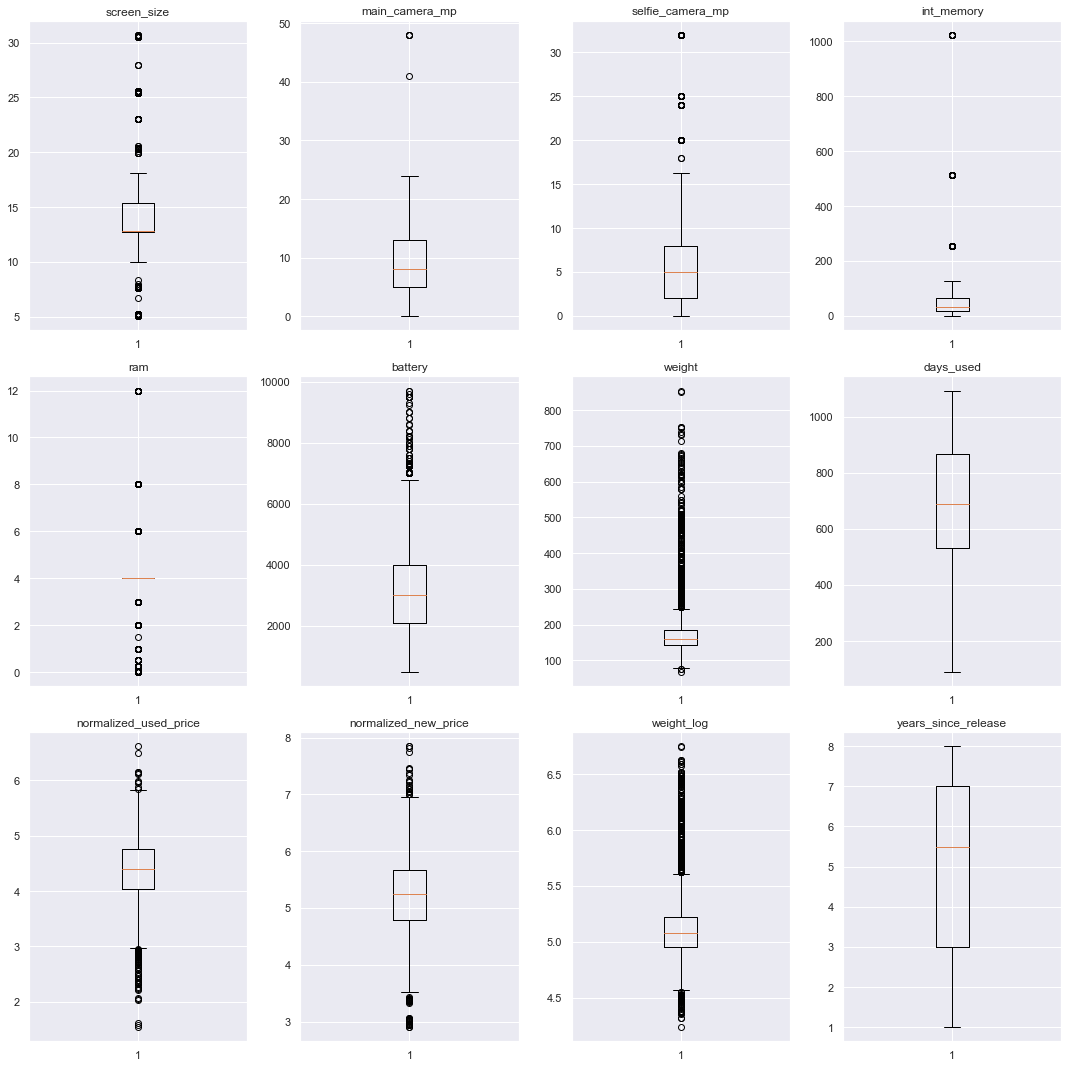

In [51]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# Outlier Treatment (if needed)

In [52]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [53]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


In [54]:
treat_out_cols = ['screen_size','main_camera_mp','selfie_camera_mp','int_memory','ram','battery','weight','normalized_used_price','normalized_new_price','weight_log']## Complete the code to specify the columns for which outliers have to be treated

df2 = treat_outliers_all(df1, treat_out_cols)

# Let's recheck the boxplots to see if outliers were treated.

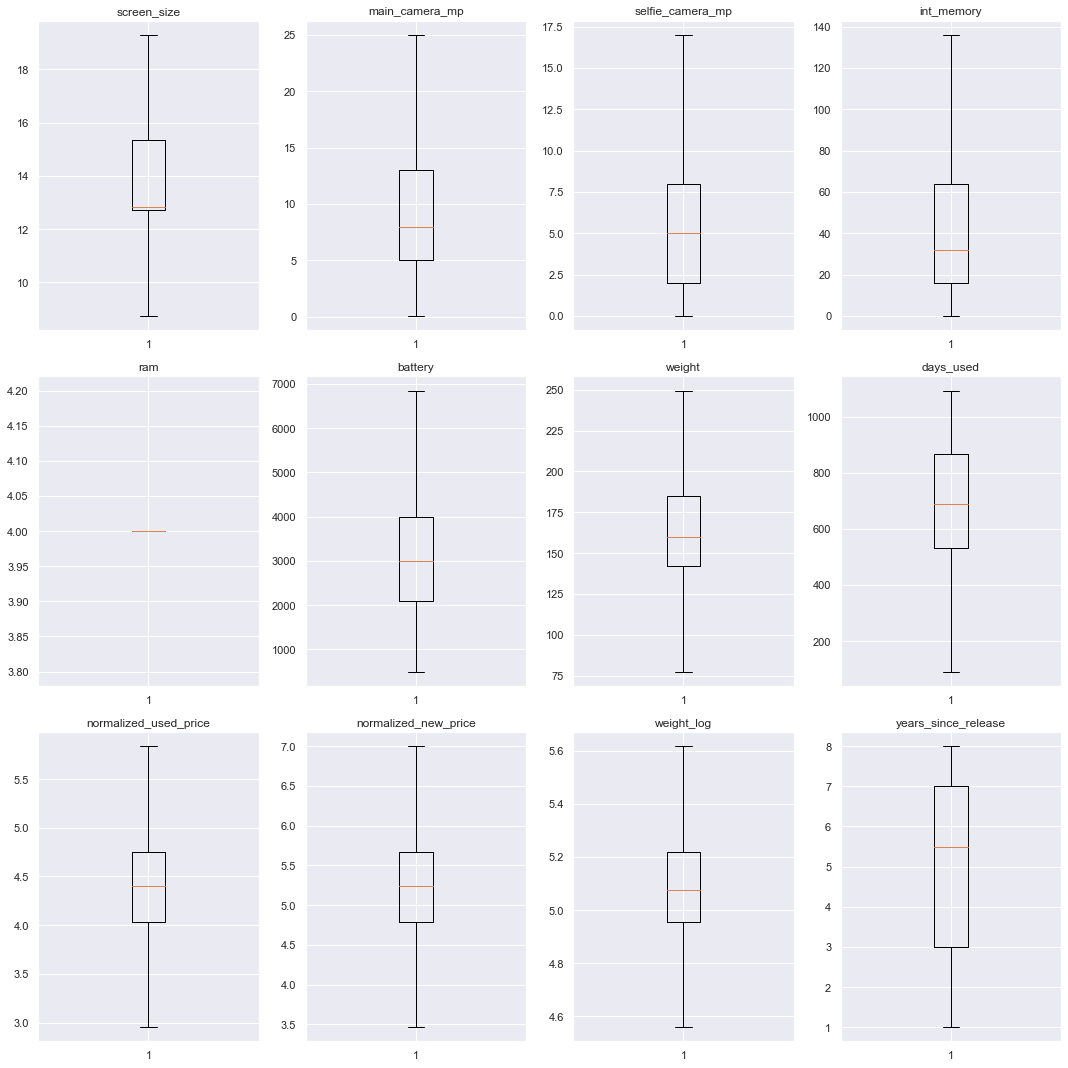

In [55]:
plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [56]:
# let's check the statistical summary of the data once
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.551595,2.807499,8.74,12.7,12.83,15.34,19.3
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.586329,4.572418,0.08,5.0,8.0,13.0,25.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,5.96242,5.345927,0.0,2.0,5.0,8.0,17.0
int_memory,3454.0,NaN,NaN,NaN,44.694079,39.079988,0.01,16.0,32.0,64.0,136.0
ram,3454.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0
battery,3454.0,NaN,NaN,NaN,3109.100898,1212.793754,500.0,2100.0,3000.0,4000.0,6850.0


# Data Preparation for modeling
We want to predict the normalized price of used devices.
Before we proceed to build a model, we'll have to encode categorical features.
We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [69]:
## Complete the code to define the dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]
print(X)
print()
print(y)



     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        19.30  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no            13.0   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0                  5.0        64.0  4.0   3020.0   146.0        127   
1                 16.0       128.0  4.0   4300.0   21

In [83]:
# creating dummy variables
X = sm.add_constant(X)

X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True,)

X.head()
                 
                   


/Users/lakshmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,weight_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,4.0,3020.0,146.0,127,4.715100,4.983607,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4.0,4300.0,213.0,325,5.519018,5.361292,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4.0,4200.0,213.0,162,5.884631,5.361292,...,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,4.0,6850.0,249.5,345,5.630961,5.617149,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,4.0,5000.0,185.0,293,4.947837,5.220356,...,0,0,0,0,0,0,0,0,1,0


In [84]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [85]:

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


#Linear Regression using statsmodels
Let's build a linear regression model using statsmodels.

In [86]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test) ## Complete the code to add contant to the test data

olsmodel1 = sm.OLS(y_train, x_train).fit() ## Complete the code to fit OLS model
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.844
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     267.5
Date:                   Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                           13:22:49   Log-Likelihood:                 224.91
No. Observations:                   2417   AIC:                            -351.8
Df Residuals:                       2368   BIC:                            -68.09
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


/Users/lakshmi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for RMSE, MAE, and R2
.
We will define a function to calculate MAPE and adjusted R2
.
We will create a function which will print out all the above metrics in one go.

In [87]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [89]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.22047,0.174333,0.844302,0.841079,4.095237


In [92]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227419,0.180257,0.842104,0.834266,4.240268


# Observations

The train and test R2 are standing at  0.84 and 0.84, indicating that the model explains 84%  of the total variation in the train and test sets respectively. This indicates there is no  Also, both scores are mostly equal.

RMSE values on the train and test sets are also comparable.

This shows that the model is not overfitting.

MAE indicates that our current model is able to predict used prices within a mean error of 0.18 on the test set.

MAPE of 4.24 on the test data means that we are able to predict within 4% of the normalized used price.

# Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

# TEST FOR MULTICOLLINEARITY
We will test for multicollinearity using VIF.

General Rule of thumb:

If VIF is 1 then there is no correlation between the k
th predictor and the remaining predictor variables.
If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))]
    return vif

In [158]:
X = x_train1
checking_vif(x_train1).sort_values('VIF', ascending=False)  ## Complete the code to check VIF on train data

,feature,VIF
4,ram,50041.057972
6,weight,188.491788
9,weight_log,187.100995
12,brand_name_Apple,12.894385
46,os_iOS,11.564057
34,brand_name_Others,9.714186
37,brand_name_Samsung,7.552793
21,brand_name_Huawei,5.988376
10,years_since_release,5.456188
0,screen_size,5.364543


# Removing Multicollinearity (if needed):

To remove multicollinearity

Drop every column one by one that has a VIF score greater than 5.
Look at the adjusted R-squared and RMSE of all these models.
Drop the variable that makes the least change in adjusted R-squared.
Check the VIF scores again.
Continue till you get all VIF scores under 5.
Let's define a function that will help us do this.

In [159]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [160]:
col_list = ['ram','weight','weight_log','brand_name_Apple','os_iOS','brand_name_Others','brand_name_Samsung'] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram,0.997440,0.223090
1,brand_name_Samsung,0.841213,0.222693
2,brand_name_Others,0.841209,0.222695
3,os_iOS,0.841016,0.222831
4,brand_name_Apple,0.840966,0.222866
5,weight_log,0.840132,0.223450
6,weight,0.837067,0.225582


In [164]:
col_to_drop = 'ram' ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2).sort_values('VIF', ascending=False)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ram


,feature,VIF
8,weight_log,363.712462
7,normalized_new_price,210.295282
0,screen_size,128.232587
5,weight,98.922650
9,years_since_release,31.539429
4,battery,27.830591
6,days_used,22.028651
1,main_camera_mp,13.620123
11,brand_name_Apple,13.055685
45,os_iOS,11.676144


In [165]:
res = treating_multicollinearity(x_train2, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.997441,0.223044
1,brand_name_Others,0.997441,0.223048
2,ram,0.997440,0.223090
3,os_iOS,0.997438,0.223207
4,brand_name_Apple,0.997437,0.223235
5,weight_log,0.997151,0.235362
6,weight,0.997115,0.236854


# Observation :
By dropping ram variable the adj R sq and RMSE scores were  not changed. 
So there is correlation between ram with  weight, weight_log, screen size,days used and many such factors are increased in vif.
Ram has high correlation between other variables.
RMSE scores of weight log and weight  varied to 23%. 
Adjusted R square has increased from 84% to 99% for other variables.

In [167]:
col_to_drop = 'weight' ## Complete the code to specify the column to drop
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train3).sort_values('VIF', ascending=False)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
6,normalized_new_price,153.899332
0,screen_size,69.025514
7,years_since_release,31.097445
4,battery,24.605579
5,days_used,21.495776
1,main_camera_mp,13.099820
9,brand_name_Apple,12.979435
43,os_iOS,11.662929
2,selfie_camera_mp,8.582353
31,brand_name_Others,7.739097


In [168]:
res = treating_multicollinearity(x_train3, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram,0.997115,0.236854
1,weight,0.997115,0.236854
2,weight_log,0.997115,0.236854
3,os_iOS,0.997114,0.236877
4,brand_name_Apple,0.997104,0.237285
5,brand_name_Samsung,0.997032,0.240213
6,brand_name_Others,0.996986,0.242066


# Observation:
With the drop of column weight there is differece in adj R sq in samsung brand and other brands.
RMSE scores of these brands has increased from 22% to 24%.
Apple brand RMSe score has increased from 0.22 to 0.23.

In [169]:
col_to_drop = 'weight_log' ## Complete the code to specify the column to drop
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train4).sort_values('VIF', ascending=False)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight_log


,feature,VIF
6,normalized_new_price,153.899332
0,screen_size,69.025514
7,years_since_release,31.097445
4,battery,24.605579
5,days_used,21.495776
1,main_camera_mp,13.099820
9,brand_name_Apple,12.979435
43,os_iOS,11.662929
2,selfie_camera_mp,8.582353
31,brand_name_Others,7.739097


In [170]:
res = treating_multicollinearity(x_train4, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram,0.997115,0.236854
1,weight,0.997115,0.236854
2,weight_log,0.997115,0.236854
3,os_iOS,0.997114,0.236877
4,brand_name_Apple,0.997104,0.237285
5,brand_name_Samsung,0.997032,0.240213
6,brand_name_Others,0.996986,0.242066


# Observation: 
    There is no difference in the values when we drop the column weight_log. vif , adj R sq and RMSE all are same.
    There is no correlation with weight_log.
    

In [171]:
col_to_drop = 'brand_name_Apple' ## Complete the code to specify the column to drop
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train5).sort_values('VIF', ascending=False)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
6,normalized_new_price,148.822632
0,screen_size,68.995028
7,years_since_release,30.958624
4,battery,24.580380
5,days_used,21.494753
1,main_camera_mp,13.099114
2,selfie_camera_mp,8.500493
43,4g_yes,7.709912
30,brand_name_Others,7.164627
33,brand_name_Samsung,5.936171


In [172]:
res = treating_multicollinearity(x_train5, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram,0.997104,0.237285
1,weight,0.997104,0.237285
2,weight_log,0.997104,0.237285
3,brand_name_Apple,0.997104,0.237285
4,os_iOS,0.997084,0.238105
5,brand_name_Samsung,0.997033,0.240197
6,brand_name_Others,0.996988,0.242020


# Observation : There is not much change in dropping apple brand column .
    All scores reflect almost the same scores. There is no multicollinearity with brand name apple.
    The new normalized price has noted a decrease in vif from train set 4 to 5 from 153.89 to 148.82. 
    

In [174]:
col_to_drop = 'brand_name_Samsung' ## Complete the code to specify the column to drop
x_train6 = x_train5.loc[:, ~x_train5.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test6 = x_test5.loc[:, ~x_test5.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train6).sort_values('VIF', ascending=False)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Samsung


,feature,VIF
6,normalized_new_price,124.930686
0,screen_size,67.991802
7,years_since_release,30.844842
4,battery,24.375780
5,days_used,21.372259
1,main_camera_mp,13.015921
2,selfie_camera_mp,8.499619
42,4g_yes,7.561923
3,int_memory,5.696818
30,brand_name_Others,2.114124


Observation : with dropping samsung brand the new normalized price has even decreased to 124.93 from 148.82

In [175]:
res = treating_multicollinearity(x_train6, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.997034,0.240161
1,ram,0.997033,0.240197
2,weight,0.997033,0.240197
3,weight_log,0.997033,0.240197
4,brand_name_Apple,0.997033,0.240197
5,brand_name_Samsung,0.997033,0.240197
6,brand_name_Others,0.996988,0.242016


Observation : RMSE scores has increased from 0.23 to 0.24.
    There is correlation in brand selection. 

# Dropping high p-value variables (if needed)¶
We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

Instead, we will do the following:
    
Build a model, check the p-values of the variables, and drop the column with the highest p-value.
Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
Repeat the above two steps till there are no columns with p-value > 0.05.
The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [178]:
# initial list of columns
cols = x_train4.columns.tolist()   ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train4[cols]   ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'days_used', 'normalized_new_price', 'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others', '4g_yes']


In [179]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [180]:
olsmodel2 = sm.OLS(y_train, x_train3).fit() ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.997
Model:                               OLS   Adj. R-squared (uncentered):              0.997
Method:                    Least Squares   F-statistic:                          2.038e+04
Date:                   Wed, 20 Apr 2022   Prob (F-statistic):                        0.00
Time:                           17:08:09   Log-Likelihood:                          72.718
No. Observations:                   2417   AIC:                                     -63.44
Df Residuals:                       2376   BIC:                                      174.0
Df Model:                             41                                                  
Covariance Type:               nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]


In [184]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2,x_train3,y_train) ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234799,0.185469,0.823406,0.820358,4.34852


In [185]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2,x_test3,y_test) ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244918,0.193867,0.816871,0.809325,4.544535


In [ ]:
Observations:The model is able to explain ~84% of the variation in the data, which is very good.

The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

The MAPE on the test set suggests we can predict within 4.5% of the normalized used price.

Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes.

# Now we'll check the rest of the assumptions on olsmod2.

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

# TEST FOR LINEARITY AND INDEPENDENCE

We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
If there is no pattern, then we say the model is linear and residuals are independent.
Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [186]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.804275,0.283212
1525,4.448399,4.661284,-0.212884
1128,4.315353,4.306423,0.008929
3003,4.282068,4.285010,-0.002941
2907,4.456438,4.420636,0.035802


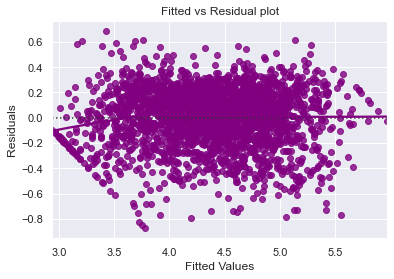

In [187]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

# TEST FOR NORMALITY
We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

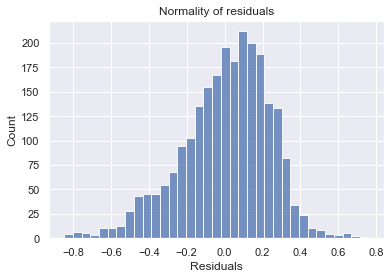

In [189]:
sns.histplot(data=df_pred, x = "Residuals") ## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

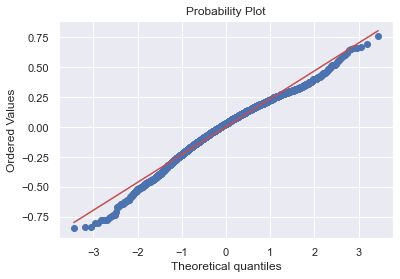

In [207]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

In [209]:
stats.shapiro(df_pred["Residuals"]) ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.9811987280845642, pvalue=2.3929407024511806e-17)

p-value is less  than level of significance.

# TEST FOR HOMOSCEDASTICITY
We will test for homoscedasticity by using the goldfeldquandt test.
If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.



In [220]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
results = olsmodel2 
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(results.resid, results.model.exog)   ## Complete the code to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.1161851648554713), ('p-value', 0.030258691181516972)]

p-value is less than level of significance

Final Model Summary

In [223]:
olsmodel_final = sm.OLS(y_train, x_train3).fit() ## Complete the code to fit the final model
print(olsmodel_final.summary())

                                  OLS Regression Results                                  
Dep. Variable:     normalized_used_price   R-squared (uncentered):                   0.997
Model:                               OLS   Adj. R-squared (uncentered):              0.997
Method:                    Least Squares   F-statistic:                          2.038e+04
Date:                   Wed, 20 Apr 2022   Prob (F-statistic):                        0.00
Time:                           21:24:11   Log-Likelihood:                          72.718
No. Observations:                   2417   AIC:                                     -63.44
Df Residuals:                       2376   BIC:                                      174.0
Df Model:                             41                                                  
Covariance Type:               nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]


In [224]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final,x_train3,y_train) ## Complete the code to check the performance on train data
olsmodel_final_train_perf



Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234799,0.185469,0.823406,0.820358,4.34852


In [225]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final,x_test3,y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244918,0.193867,0.816871,0.809325,4.544535


# Observations:
R Squared is Training and Test performance is 82% and 80% respectively. This means that our model shows the given percentages of variation. Scores are comparable.
RMSE scores are also comparable.
The model is not over fitting
It shows that current model can predict the MAE at 0.19 on test set.
MAPE on test set shows that we can predict the normalized used price within 5% of the used price.